Implementation source: https://github.com/vgupta123/recourse-equalization/tree/master

In [1]:
import sys
sys.path.append("..")

In [4]:
import numpy as np
import pandas as pd
from sklearn.base import clone
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from mlresearch.utils import set_matplotlib_style, feature_to_color
from functions import biased_data_generator_hc, get_scaler_hc
from equalizing_recourse_across_groups import prepare_data, run_agnostic
from blackbox_agnostic import LimeTabularClassification
from sklearn.utils import check_random_state

set_matplotlib_style()

N_AGENTS = 100
N_LOANS = 10
BIAS_FACTOR = 2
N_CONTINUOUS = 2
RNG_SEED = 42
rng = np.random.default_rng(RNG_SEED)

# Implementation

In [5]:
scaler = get_scaler_hc(
    n_agents=10_000, 
    bias_factor=BIAS_FACTOR, 
    random_state=rng,
    N_AGENTS=N_AGENTS, 
    N_LOANS=N_LOANS
)

df = biased_data_generator_hc(N_AGENTS, n_continuous=N_CONTINUOUS, bias_factor=BIAS_FACTOR, scaler=scaler, random_state=rng, N_LOANS=35, N_AGENTS=N_AGENTS)

<Axes: xlabel='f0', ylabel='f1'>

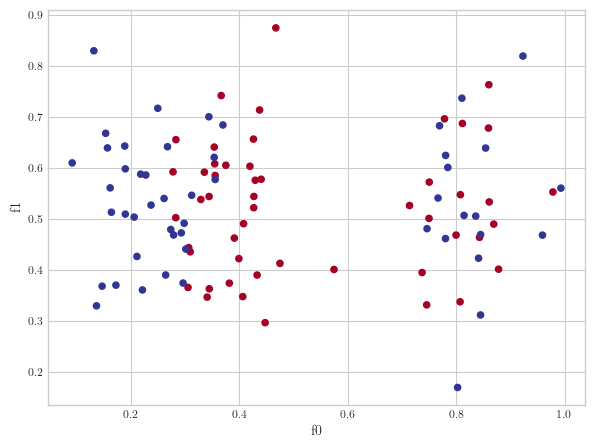

In [6]:
df.plot.scatter("f0", "f1", c=feature_to_color(df["groups"]))
# df.plot.scatter("f0", "f1", c=feature_to_color(y))

In [7]:
lf = LimeTabularClassification(df.drop(columns="groups").values, sample_around_instance=False, random_state=42)
model = RandomForestClassifier(random_state=42).fit(df.drop(columns="groups").values, rng.binomial(1,0.5,df.shape[0]))

In [ ]:
y = pd.Series(model.predict(df.drop(columns="groups").values), index=df.index)

In [ ]:
from collections import Counter
Counter(y)

In [ ]:
df.values[:10]

In [ ]:
data, d, ntr, ntst = prepare_data(df, y)
# data["trainx"]

In [ ]:
lf.scaler.scale_

In [ ]:
# sample, weights, distsnpreds = lf.cal_distance(data["trainx"], model.predict_proba)
# distsnpreds  # -> distance, score, prediction

In [ ]:
model_regularized = run_agnostic(df, y, RandomForestClassifier(random_state=42), sed=1)

In [ ]:
model.feature_importances_

In [ ]:
model_regularized.feature_importances_

In [ ]:
df.plot.scatter("f0", "f1", c=feature_to_color(model.predict_proba(df.drop(columns="groups"))[:,1]))

In [ ]:
df.plot.scatter("f0", "f1", c=feature_to_color(model_regularized.predict_proba(df.drop(columns="groups"))[:,1]))

In [ ]:
# model.coef_, model.intercept_

In [ ]:
# model_regularized.coef_, model_regularized.intercept_

In [ ]:
# model.get_params() == model_regularized.get_params()